In [17]:
import hypertools as hyp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os 
from scipy.linalg import qr
sns.set(style='white', palette='colorblind', context='poster')
%matplotlib inline

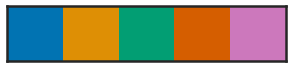

In [4]:
cbpal = sns.color_palette('colorblind', n_colors=5)
sns.palplot(cbpal)
cbpal = [cbpal[0], cbpal[-1]]

In [44]:
np.random.seed(0)
n_time_points = 7
n_dim = 3
n_subjects = 2
noise = .05
S = np.random.normal(loc=0, scale=1, size=(n_time_points, n_dim))

X = [None] * n_subjects
Q = [None] * n_subjects
N = [None] * n_subjects
for i in range(n_subjects):
    H = np.random.randn(n_dim, n_dim)
    Q[i], _ = qr(H)
    N[i] = np.random.normal(loc=0, scale=noise, size=(n_time_points, n_dim))
    X[i] = S @ Q[i] + N[i]

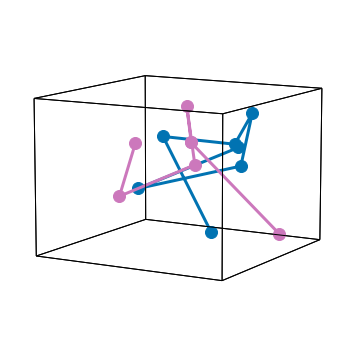

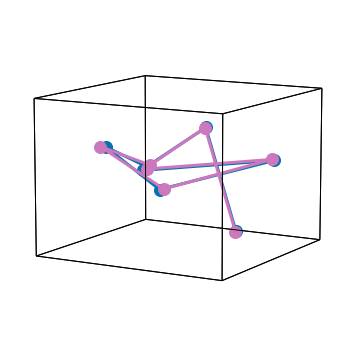

In [46]:
figsize = (6, 5)
fmt = '-o'
save_path = 'figs/'
native_save_path = os.path.join(save_path, 'native.png')
shared_save_path = os.path.join(save_path, 'shared.png')

hyp.plot(X, color=cbpal,fmt=fmt, size = figsize, save_path=native_save_path)
hyp.plot(X, align='SRM', color=cbpal,fmt=fmt, size = figsize, save_path=shared_save_path)